In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('life_exp_gdp.csv')
print(data.head())
#check if all columns have propper data type
print(data.dtypes)
#check overall statistic (means, etc.)
print(data.describe())
#check if there are null values (there aren't, great!)
print(data.isna().value_counts())
#which countries and years we have
print(data['Country'].unique(), data['Year'].unique())

#make column names more convinient
data.columns = data.columns.str.lower()
data.rename(columns = {'life expectancy at birth (years)':'life_exp'}, inplace = True)
print(data.columns)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000      

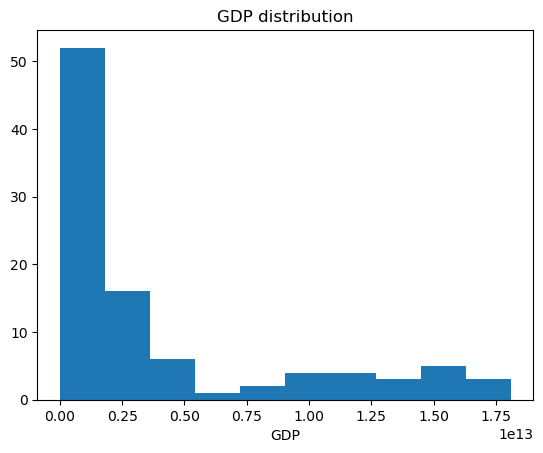

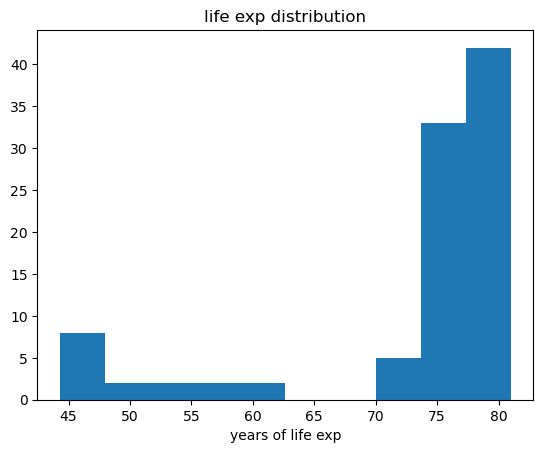

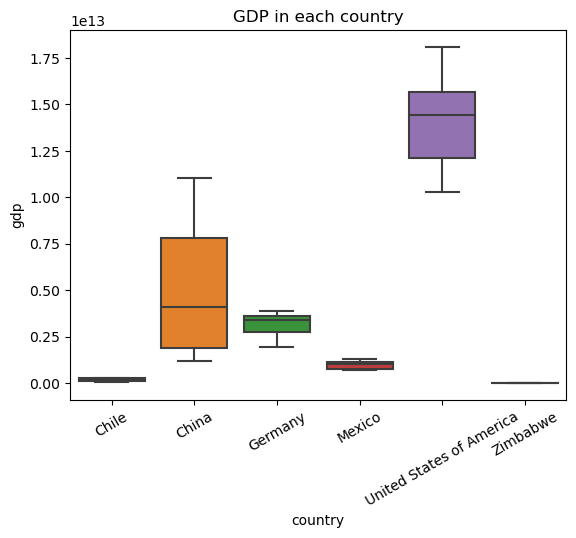

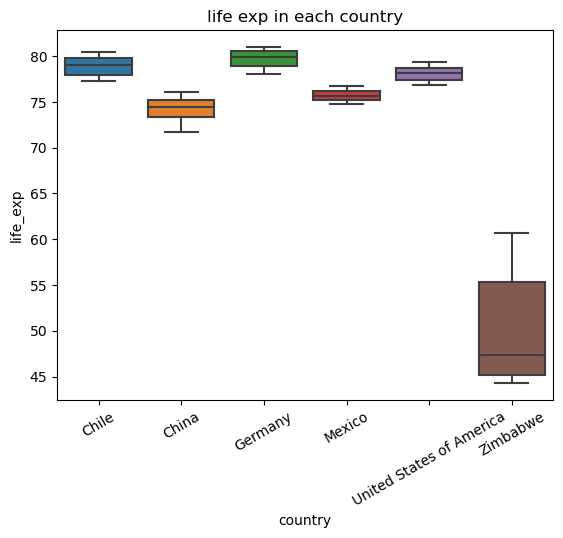

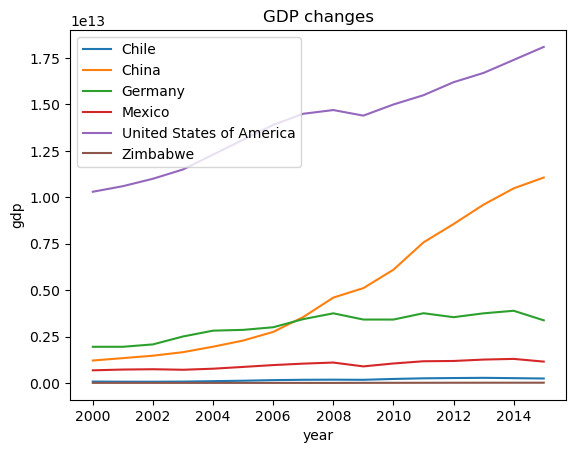

C:\Users\nelia\AppData\Local\Temp\ipykernel_14628\1549718089.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.gdp = data_2.gdp.pct_change() * 100 #calculate % of change
C:\Users\nelia\AppData\Local\Temp\ipykernel_14628\1549718089.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.gdp = data_2.gdp.pct_change() * 100 #calculate % of change
C:\Users\nelia\AppData\Local\Temp\ipykernel_14628\1549718089.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

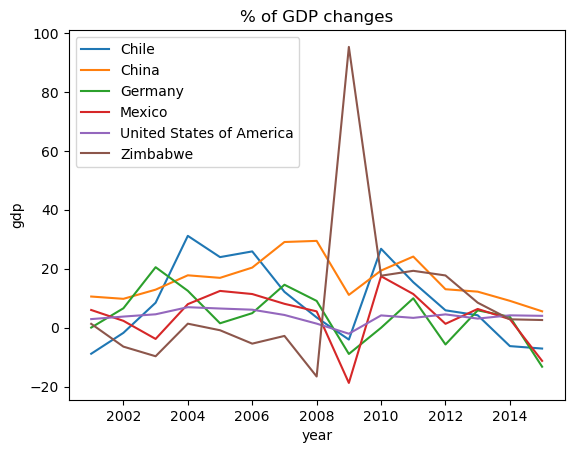

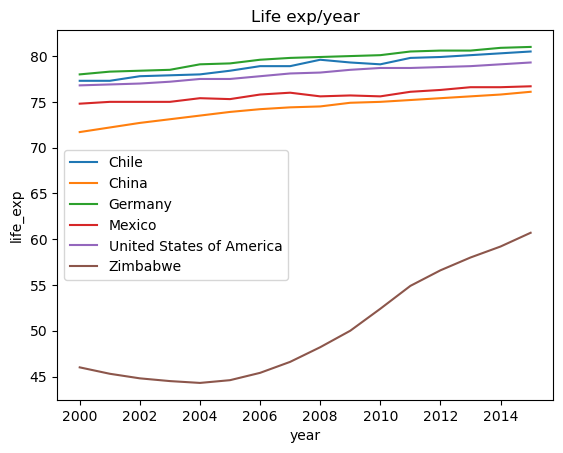

<Figure size 640x480 with 0 Axes>

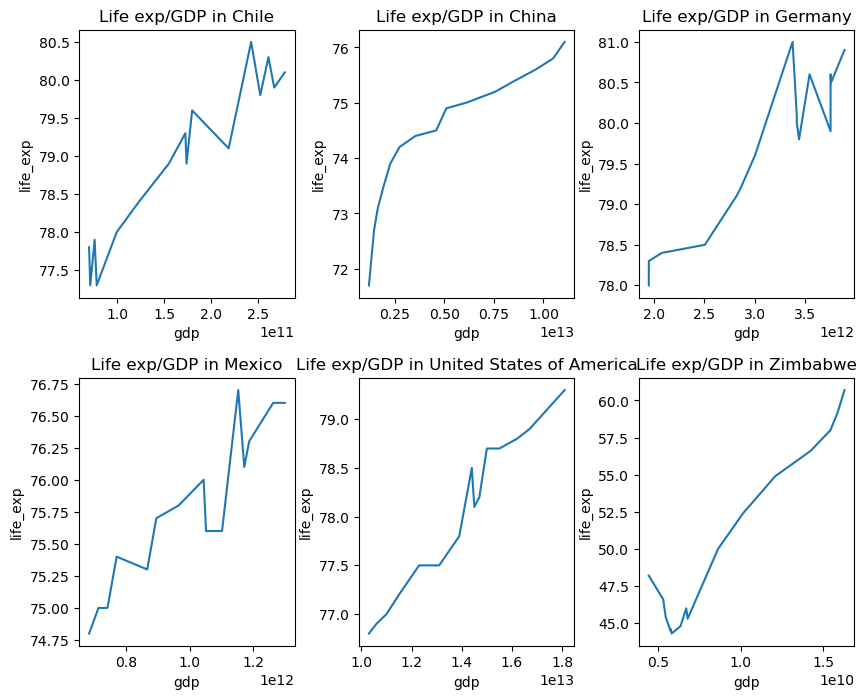

<Figure size 640x480 with 0 Axes>

In [71]:
#GDP distribution (histogram)
plt.hist(data.gdp)
plt.title('GDP distribution')
plt.xlabel('GDP')
plt.show()
plt.clf() #distribution if right-skewed
#life expectancy distribution
plt.hist(data.life_exp)
plt.title('life exp distribution')
plt.xlabel('years of life exp')
plt.show()
plt.clf() #distribution is left-skewed

# boxpot for gdp in each country to visualize mean, range, etc
ax = sns.boxplot(x = 'country', y='gdp', data = data)
ax.tick_params(axis ='x', labelrotation = 30)
plt.title('GDP in each country')
plt.show()
plt.clf() #GDP in US looks significantly higher than in other countries
# boxpot for life exp in each country to visualize mean, range, etc
ax = sns.boxplot(x = 'country', y='life_exp', data = data)
ax.tick_params(axis ='x', labelrotation = 30)
plt.title('life exp in each country')
plt.show()
plt.clf() #life exp in Zimbabwe looks significantly lower than in other countries
#Although GDP in US is higher than in other countries, life exp there are not higher. To get more reliable information about GDP and life exp we should take GDP per capita

countries = data.country.unique()
#does GDP change in each country
for country in countries:
    sns.lineplot(x = 'year', y = 'gdp', data = data[data.country == country], label = country)
plt.legend()
plt.title('GDP changes')
plt.show()
plt.clf() #GDP grows very rapidly in China, while in Zimbabwe we see no difference (or problem is in scale of the axis)
#does growth rates of GDP slow down?
for country in countries:
    data_2 = data.loc[data.country == country]
    data_2.gdp = data_2.gdp.pct_change() * 100 #calculate % of change 
    sns.lineplot(x = 'year', y = 'gdp', data = data_2, label = country)
plt.legend()
plt.title('% of GDP changes')
plt.show()
plt.clf()
#does life exp grow in each country
for country in countries:
    sns.lineplot(x = 'year', y = 'life_exp', data = data[data.country == country], label = country)
plt.legend()
plt.title('Life exp/year')
plt.show()
plt.clf() #life exp grows in every country
#does life exp depend on GDP
plt.figure(figsize =(10,8))
for i in range(len(countries)):
    plt.subplot(2, int(len(countries)/2), i+1)
    sns.lineplot(x = 'gdp', y = 'life_exp', data = data[data.country == countries[i]])
    plt.title('Life exp/GDP in {}'.format(countries[i]))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()
plt.clf() #it looks like there is a correlation between life exp and gdp changes in every country
